##  Life Expectancy dataset

Dataset:https://www.kaggle.com/kumarajarshi/life-expectancy-who


Importing required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

Reading the Life Expectancy dataset, using pandas.

In [2]:
df = pd.read_csv(r"C:\Users\vvars\Downloads\Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


Dropping the examples with missing values. Now, the dataset has no missing values.

In [5]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Country   Year  Status  Life expectancy   Adult Mortality  \
0       False  False   False             False            False   
1       False  False   False             False            False   
2       False  False   False             False            False   
3       False  False   False             False            False   
4       False  False   False             False            False   
...       ...    ...     ...               ...              ...   
2933    False  False   False             False            False   
2934    False  False   False             False            False   
2935    False  False   False             False            False   
2936    False  False   False             False            False   
2937    False  False   False             False            False   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             False    False                   False  

In [6]:
df['Population'] = df['Population']/1000000
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,0.125525,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12.366165,1.6,1.7,0.427,9.8


In [7]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

Looking at Turkeys numbers.


In [8]:
Turkey =df[df['Country'] == 'Turkey']
Turkey

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2682,Turkey,2014,Developing,75.5,17.0,16,1.45,181.908378,96.0,565,...,96.0,5.41,96.0,0.1,12127.225220,0.773628,4.9,4.7,0.759,14.5
2683,Turkey,2013,Developing,75.2,19.0,17,1.41,188.144035,97.0,7405,...,98.0,5.38,98.0,0.1,12542.935650,75.787333,4.9,4.7,0.754,14.4
2684,Turkey,2012,Developing,74.8,112.0,19,1.54,20.751202,97.0,349,...,97.0,5.24,97.0,0.1,1172.384300,74.569867,4.9,4.7,0.750,14.3
2685,Turkey,2011,Developing,74.5,114.0,20,1.53,1275.877569,96.0,111,...,97.0,5.29,97.0,0.1,11341.133950,7.349455,4.9,4.7,0.737,13.8
2686,Turkey,2010,Developing,74.2,116.0,21,1.49,32.782358,96.0,7,...,97.0,5.61,97.0,0.1,1672.569300,72.326914,4.9,4.7,0.715,13.0
2687,Turkey,2009,Developing,73.9,118.0,23,1.40,106.948290,94.0,4,...,96.0,6.80,96.0,0.1,936.499911,71.339185,4.9,4.8,0.709,12.5
2688,Turkey,2008,Developing,73.5,121.0,25,1.39,22.672718,92.0,0,...,96.0,6.70,96.0,0.1,185.689750,0.074432,5.0,4.8,0.705,12.5
2689,Turkey,2007,Developing,73.2,124.0,26,1.26,115.580110,96.0,3,...,96.0,6.40,96.0,0.1,979.492460,69.597281,5.0,4.8,0.697,12.3
2690,Turkey,2006,Developing,72.8,126.0,28,1.29,103.523776,82.0,34,...,9.0,5.81,9.0,0.1,834.869161,6.876345,5.0,4.8,0.687,11.9
2691,Turkey,2005,Developing,72.4,129.0,30,1.29,832.955206,85.0,6200,...,9.0,5.45,9.0,0.1,7384.354661,0.679346,5.0,4.9,0.681,11.9


This plot shows that Turkey's life expectancy was 74 at year 2000, peaked at 78 one year after and hit the bottom with 71 at 2002. Then it increases lineary.

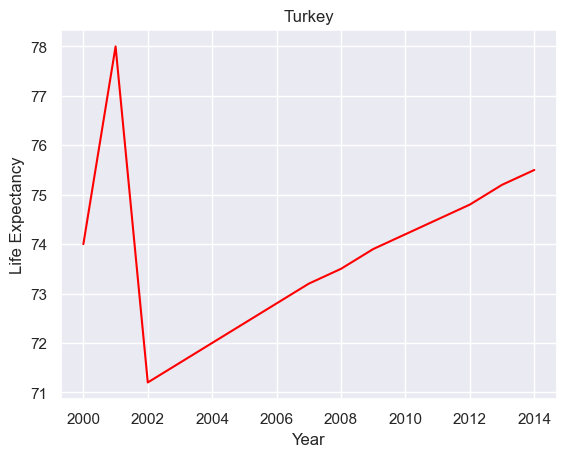

In [9]:
plt.plot(Turkey['Year'], Turkey['Life expectancy '], color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title("Turkey")
plt.show()

In [10]:
df['Status'].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

This boxplot shows that developed countries are stable because the range of the live expectancy age of developed countries is short, also the developing countries may have very different life expenctacy rates. 

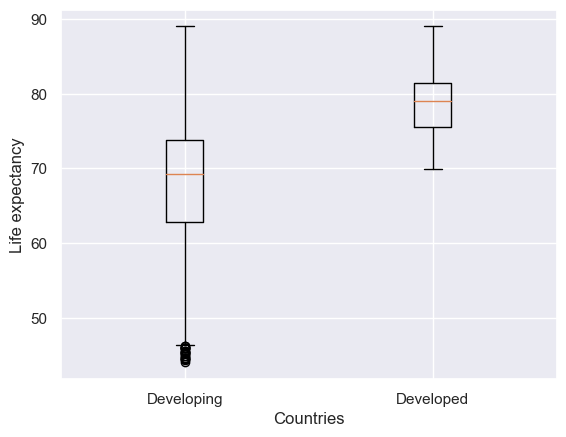

In [11]:
plt.boxplot([df[df['Status']=='Developing']['Life expectancy '], df[df['Status']=='Developed']['Life expectancy ']], labels=['Developing','Developed'])
plt.ylabel('Life expectancy')
plt.xlabel('Countries')
plt.show()

This dataframe shows the countries with lowest and highest life expectancy. We can see African countries generally have the lowest life expectancy and the European ones have the highest.

In [12]:
df.sort_values("Life expectancy ")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1583,Malawi,2002,Developing,44.0,67.0,46,1.10,3.885395,64.0,92,...,79.0,4.82,64.0,24.7,29.979898,1.213711,7.7,7.6,0.388,10.4
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.4,0.407,9.2
1484,Lesotho,2005,Developing,44.5,675.0,5,2.67,57.903698,87.0,0,...,88.0,6.30,89.0,34.8,862.946312,1.949543,9.3,9.2,0.437,10.7
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.9,0.418,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,0.129432,9.0,9.0,0.406,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,France,2008,Developing,89.0,88.0,3,11.90,7002.785925,47.0,604,...,98.0,1.57,98.0,0.1,45413.657100,6.437499,0.6,0.6,0.877,16.1
2056,Portugal,2014,Developed,89.0,78.0,0,9.88,271.254553,98.0,0,...,98.0,9.50,98.0,0.1,2277.536130,0.014162,0.7,0.5,0.837,16.8
995,Germany,2014,Developed,89.0,69.0,2,11.03,941.756291,88.0,443,...,94.0,11.30,95.0,0.1,4792.652880,0.089825,1.1,1.1,0.920,17.0
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,...,99.0,1.59,99.0,0.1,47439.396840,0.112957,1.0,1.0,0.890,16.3


This plot shows that the countries with high  GDP (Gross domestic product) have high life expectancy.

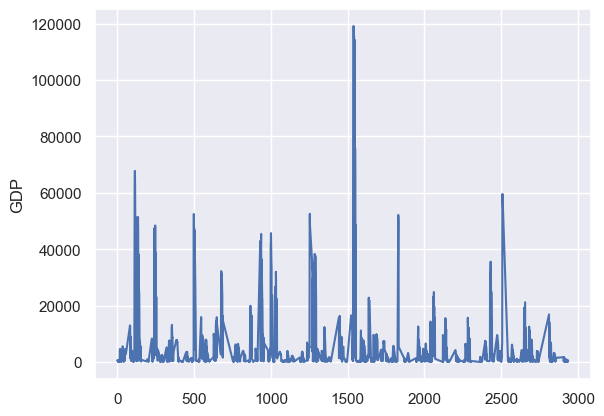

In [14]:
sns.lineplot(df['GDP'])
plt.show()

Converting the Status column to 1s and 0s to use it on the model.

In [15]:
l_encoder= preprocessing.LabelEncoder()
df.loc[:,'Status'] = l_encoder.fit_transform(df.loc[:,'Status'])
df['Status'].value_counts()

1    1407
0     242
Name: Status, dtype: int64

In [16]:
df.loc[:, 'Country'] = l_encoder.fit_transform(df.loc[:, 'Country'])
df['Country'].value_counts()

0      16
1      16
65     15
80     15
79     15
       ..
58      5
115     4
88      4
53      2
38      1
Name: Country, Length: 133, dtype: int64

Correlation map of the features. 1 means positively correlated, -1 means negatively correlated. Infant deaths and Under-Five deaths are positively correlated so we need to drop one of them. GDP and percentage expenditure are highly correlated too. Also thinness 1-19 years and thinness 5-9 are highly correlated. I would like to drop one of the features, if their correlation is bigger than 0.75 or less than -0.75. So I will drop Infant deaths (because under-five also includes it), percentage expenditure (I think GDP has more important informations) and thinness 5-9 years (because thinness 1-19 also includes it) as well as Income composition of resources which has 0.78 correlation with Schooling.   

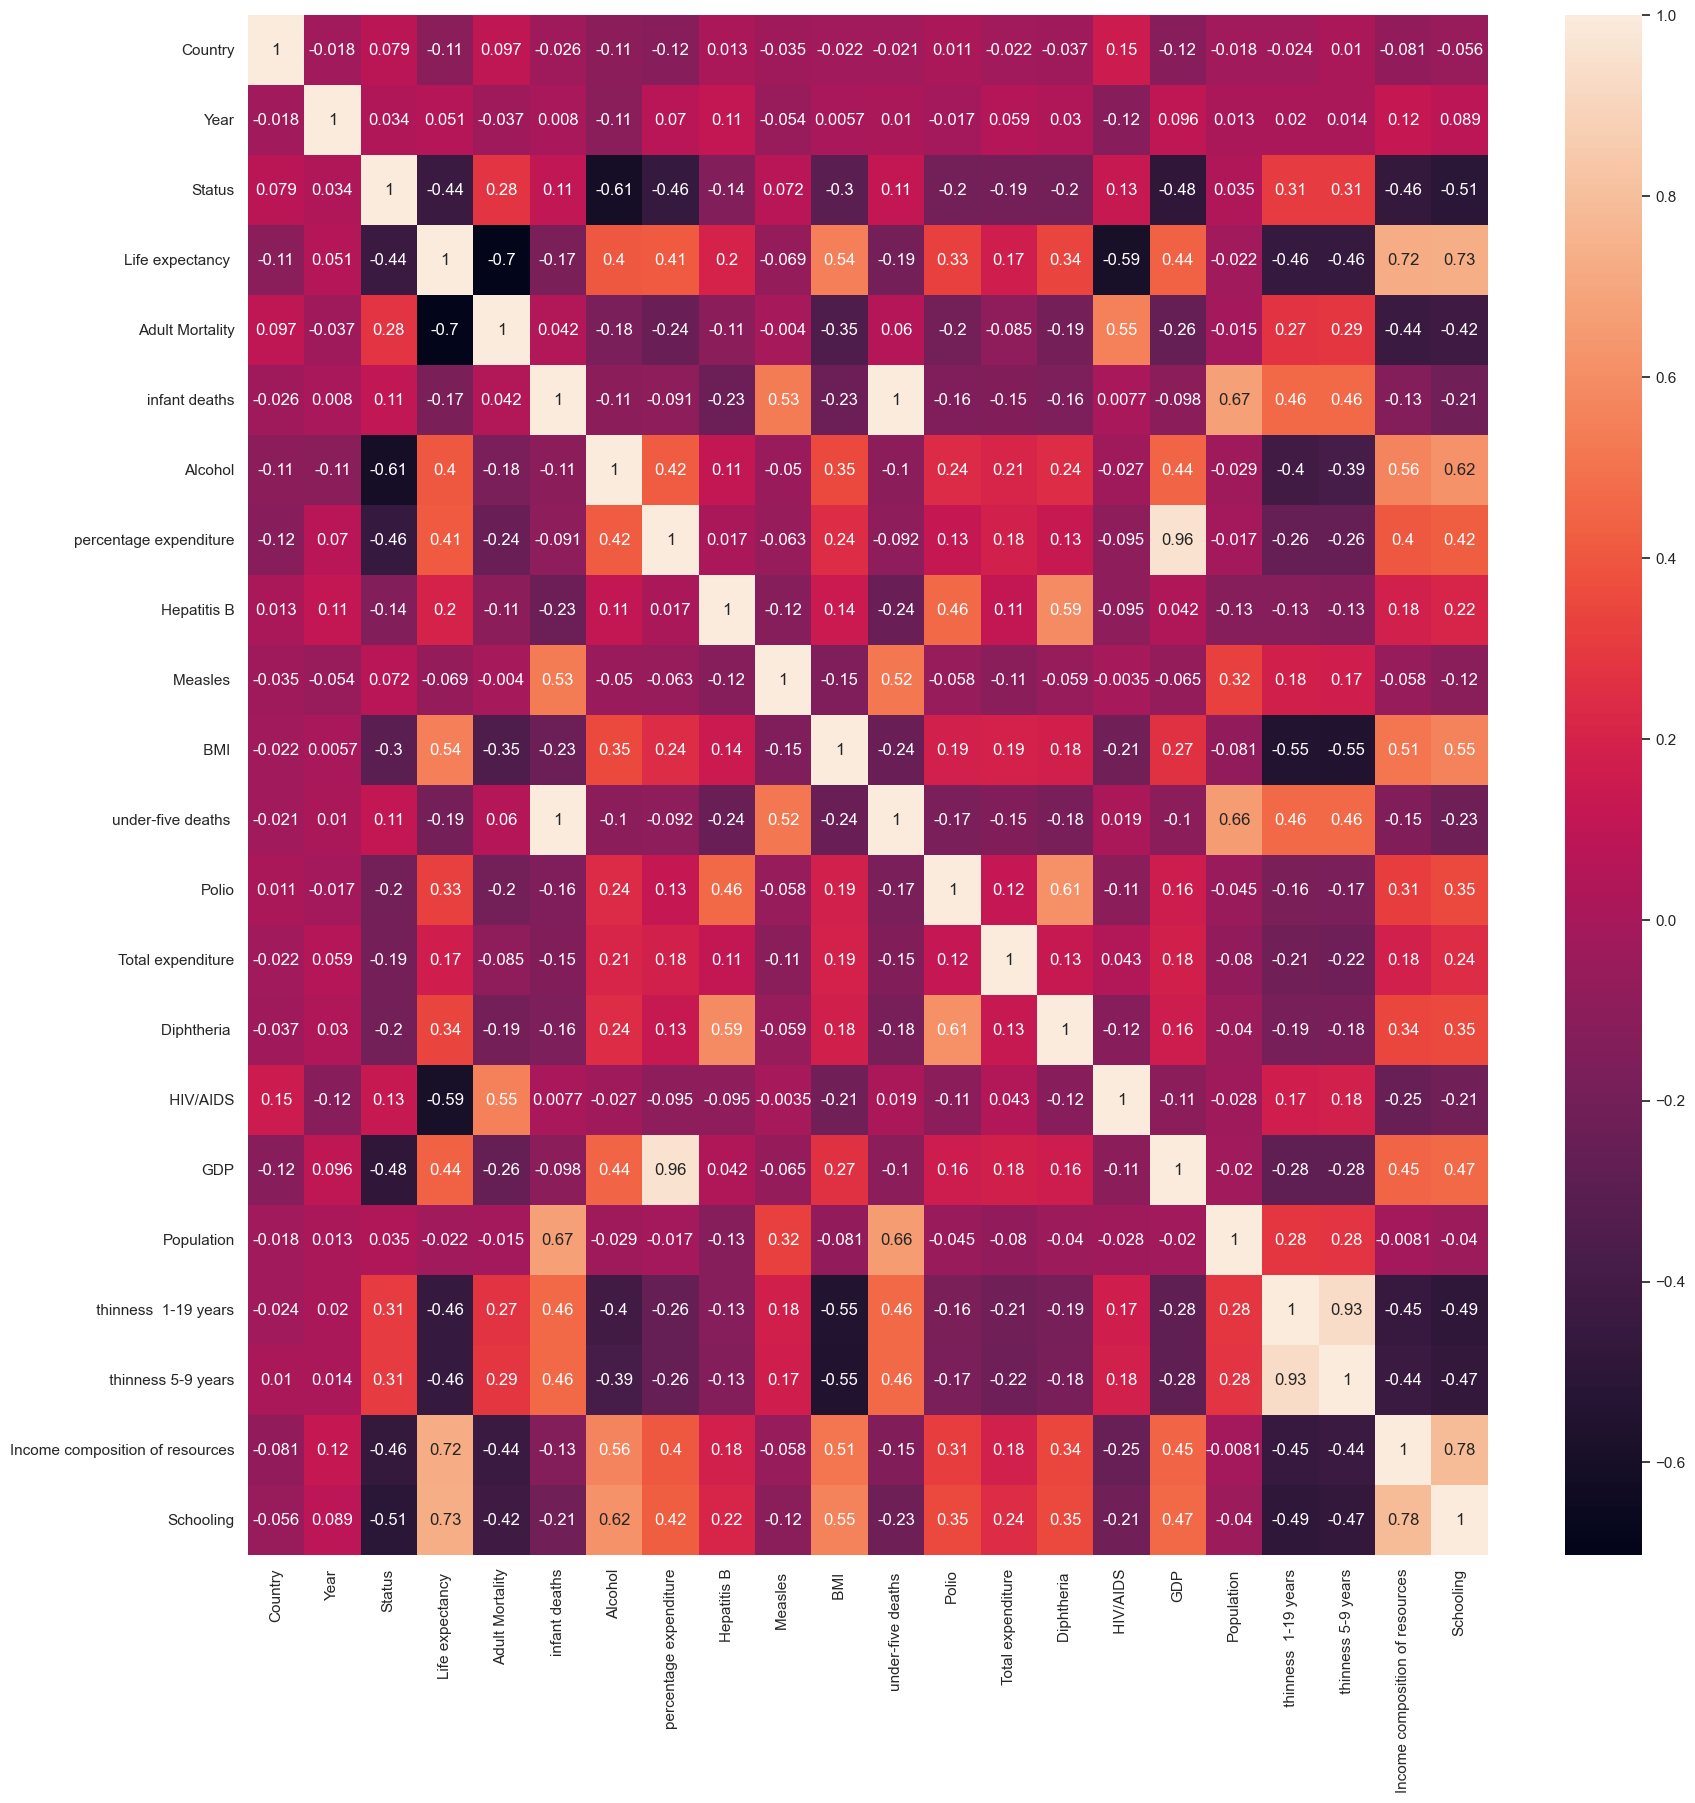

In [17]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

The dataset after dropping the correlated features.

In [18]:
df =df.drop(labels=['Income composition of resources', ' thinness 5-9 years', 
                'infant deaths', 'percentage expenditure'], axis=1)
df

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,10.1
1,0,2014,1,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,10.0
2,0,2013,1,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,9.9
3,0,2012,1,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,9.8
4,0,2011,1,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,44.3,723.0,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.2
2934,132,2003,1,44.5,715.0,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.5
2935,132,2002,1,44.8,73.0,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,0.125525,1.2,10.0
2936,132,2001,1,45.3,686.0,1.72,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12.366165,1.6,9.8


Y label of the model will be Life expectancy column. So we seperate it from the dataframe.

In [19]:
y = df['Life expectancy ']
df = df.drop(labels='Life expectancy ', axis=1)
df

,Country,Year,Status,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,10.1
1,0,2014,1,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,10.0
2,0,2013,1,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,9.9
3,0,2012,1,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,9.8
4,0,2011,1,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,723.0,4.36,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.2
2934,132,2003,1,715.0,4.06,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.5
2935,132,2002,1,73.0,4.43,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,0.125525,1.2,10.0
2936,132,2001,1,686.0,1.72,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12.366165,1.6,9.8


In [20]:
y = y.to_numpy(dtype='float64')
y

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

Dividing the dataset into train, validation and test sets. 
%80 training set, %10 validation set, %10 test set.

In [21]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(f'X_train shape -->{x_train.shape}')
print(f'X_valid shape -->{x_valid.shape}')
print(f'X_test shape -->{x_test.shape}')
print(f'y_train shape -->{y_train.shape}')
print(f'y_valid shape -->{y_valid.shape}')
print(f'y_test shape -->{y_test.shape}')

X_train shape -->(1319, 17)
X_valid shape -->(165, 17)
X_test shape -->(165, 17)
y_train shape -->(1319,)
y_valid shape -->(165,)
y_test shape -->(165,)


Standardization the features using Sklearn. Fitted the train set (because we only want to use these values) and transformed all sets.

In [22]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

Last version of the training set.

In [23]:
x_train

array([[-0.51128185,  0.78367891,  0.41023228, ...,  0.17827985,
         0.44055795, -0.42801883],
       [-1.61551902, -1.43186106,  0.41023228, ..., -0.16605599,
        -0.79715621,  1.49260545],
       [ 0.74703494, -0.20100552,  0.41023228, ...,  0.22946212,
        -0.79715621,  0.39002484],
       ...,
       [ 0.07935664,  0.29133669, -2.43764338, ..., -0.17616066,
        -0.44972767,  1.59930679],
       [ 1.31199349,  0.04516559,  0.41023228, ..., -0.11980142,
         0.78798649,  0.28332349],
       [ 0.6443152 ,  0.5375078 ,  0.41023228, ..., -0.19886689,
        -0.58001337, -1.63730078]])

Model 1: Linear Regression

Using Linear Regression as the first model. Model is trained on the train set and made predictions for validation set. Mean Squared Error is used to compute the loss.

In [24]:
model = linear_model.LinearRegression()
model.fit(X=x_train, y=y_train)
val_hat = model.predict(x_valid)
metrics.mean_squared_error(y_valid, val_hat)

14.462229070381309

Model 2: Poisson Regressor

Using Poisson Regressor as the second model. Defined the hyper-parameter alpha as 0.1 and maximum iterations is 100. The Mean Squared Error is less than the Linear Regression, so this is our best model.

In [25]:
poisson = linear_model.PoissonRegressor(alpha=0.1, max_iter=500)
poisson.fit(X=x_train, y=y_train)
poi_hat = poisson.predict(x_valid)
metrics.mean_squared_error(y_valid, poi_hat)

14.39391590226341

Model 3: Gamma Regressor

Using Gamma Regressor as the last model. Used the same parameters as the Poisson Regressor. The Mean Squared Error is higher, so we will use the Poisson Regressor on our test set.

In [26]:
gamma = linear_model.GammaRegressor(alpha=0.1, max_iter=500)
gamma.fit(x_train, y_train)
gamma_val = gamma.predict(x_valid)
metrics.mean_squared_error(y_valid, gamma_val)

14.525653516888873

We test the test set with the Poisson Regressor. Used a different metric which is similar to accuracy.

In [27]:
poi_test = poisson.predict(x_test)
metrics.r2_score(y_test, poi_test)

0.8115671625256465